In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
refugees_df = pd.read_csv("../data/UNdata_refugees.csv", skipfooter=3, engine='python')

In [3]:
refugees_df["Year"].min()

1975

In [34]:
ref_df = refugees_df[["Country or territory of asylum or residence", "Country or territory of origin", 
                      "Year", "Refugees<sup>*</sup>"]]
ref_df = ref_df.rename({"Country or territory of asylum or residence": "asylum", 
                        "Country or territory of origin": "origin", "Refugees<sup>*</sup>": "refugees"}, axis="columns")
ref_df["Year"] = ref_df["Year"].astype(int)
ref_df = ref_df.dropna() # There are 198 rows with refugees as NA
ref_df["refugees"] = ref_df["refugees"].astype(int)

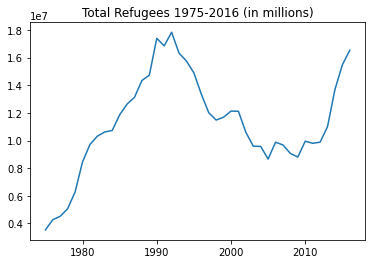

In [35]:
plt.plot(ref_df.groupby("Year").sum())
plt.title("Total Refugees 1975-2016 (in millions)")
print()

In [37]:
ref_df[ref_df["Year"] == 2016].groupby("origin").sum().sort_values("refugees", ascending=False)\
                            .head(20).style.format('{:,}')
# Country refugee totals for 2016

,Year,refugees
origin,,
Syrian Arab Rep.,"245,952","5,500,448"
Afghanistan,"189,504","2,488,689"
South Sudan,"86,688","1,436,651"
Somalia,"221,760","1,012,323"
Sudan,"211,680","646,036"
Dem. Rep. of the Congo,"201,600","537,265"
Central African Rep.,"114,912","490,892"
Eritrea,"183,456","431,704"
Burundi,"149,184","408,085"


In [38]:
ref_df[ref_df["Year"] == 2016].groupby("origin").sum().sort_values("refugees", ascending=False)\
    .head(20)[["refugees"]].style.format('{:,}')

,refugees
origin,
Syrian Arab Rep.,"5,500,448"
Afghanistan,"2,488,689"
South Sudan,"1,436,651"
Somalia,"1,012,323"
Sudan,"646,036"
Dem. Rep. of the Congo,"537,265"
Central African Rep.,"490,892"
Eritrea,"431,704"
Burundi,"408,085"


In [8]:
ref_df[ref_df["Year"] == 1992].groupby("origin").sum().sort_values("refugees", ascending=False).head(20)[["refugees"]]

,refugees
origin,
Afghanistan,4552153.0
Various,3118510.0
Mozambique,1445474.0
Iraq,1343824.0
Somalia,812195.0
Liberia,520915.0
Viet Nam,517111.0
Eritrea,503200.0
Bosnia and Herzegovina,437501.0


In [9]:
ref_df.sort_values("refugees",
                   ascending=False).groupby("origin").sum().sort_values("refugees", ascending=False).head(20)[["refugees"]]

,refugees
origin,
Afghanistan,125836802.0
Various,53954607.0
Iraq,26456503.0
Ethiopia,23286613.0
Somalia,19003975.0
Syrian Arab Rep.,17662833.0
Sudan,15058675.0
Viet Nam,14839294.0
Angola,13013851.0


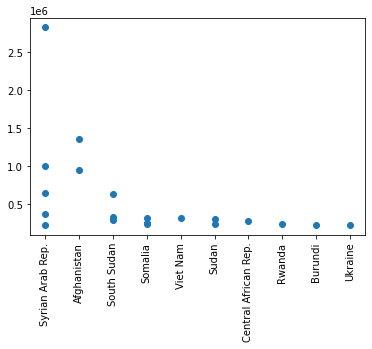

In [10]:
# Need to sum origin, multiple asylum countries reason for multiple values
plt.scatter(ref_df[ref_df["Year"] == 2016].sort_values("refugees", ascending=False).head(20)["origin"],
            ref_df[ref_df["Year"] == 2016].sort_values("refugees", ascending=False).head(20)["refugees"])
plt.xticks(rotation=90)
print()

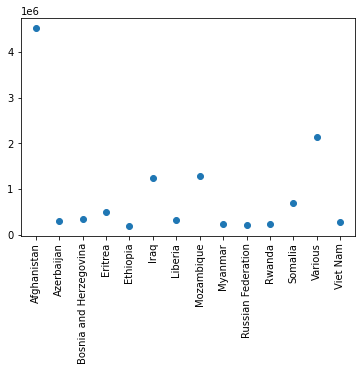

In [11]:
plt.scatter(ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().index,
            ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().iloc[:,1])
plt.xticks(rotation=90)
print()

In [12]:
ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().index

Index(['Afghanistan', 'Azerbaijan', 'Bosnia and Herzegovina', 'Eritrea',
       'Ethiopia', 'Iraq', 'Liberia', 'Mozambique', 'Myanmar',
       'Russian Federation', 'Rwanda', 'Somalia', 'Various', 'Viet Nam'],
      dtype='object', name='origin')

In [13]:
ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).groupby("origin").sum().head(20).iloc[:,1]

origin
Afghanistan                         4552153.0
Albania                                4353.0
Algeria                                  71.0
Angola                               300492.0
Argentina                               113.0
Armenia                              195003.0
Azerbaijan                           300000.0
Bahrain                                  53.0
Bangladesh                            53921.0
Benin                                     4.0
Bhutan                                75442.0
Bolivia (Plurinational State of)         28.0
Bosnia and Herzegovina               437501.0
Botswana                                  3.0
Brazil                                   11.0
Bulgaria                               2981.0
Burkina Faso                             61.0
Burundi                              184135.0
Cabo Verde                                1.0
Cambodia                              28851.0
Name: refugees, dtype: float64

In [14]:
tmp_df = ref_df[ref_df["Year"] == 2016].groupby("origin").sum().sort_values("refugees", ascending=False).head(20).reset_index()

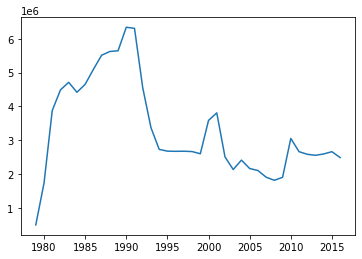

In [40]:
plt.plot(ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()["refugees"])

In [16]:
ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()

,refugees
Year,
1979,500000.0
1980,1734921.0
1981,3879984.0
1982,4488214.0
1983,4712735.0
1984,4417651.0
1985,4653193.0
1986,5094283.0
1987,5511740.0
